In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyreadr
from spline_utils import spline_values

In [2]:
input = np.array(pyreadr.read_r("0-Data/dengue_indonesia_yifan/data/temp_monthly_admin2.rds")[None]['temperature_celsius'])
input = input[~np.isnan(input)]
# input = input.reshape((-1, 1))

In [3]:
input = np.linspace(0, 1, 1000)

In [4]:
knots = np.linspace(np.min(input), np.max(input), 3)
input[-1] += -1e-3

In [5]:
np.isnan(input).sum()

np.int64(0)

In [ ]:
def spline_values(input, order, ext_knots):
    if np.isnan(input).sum() > 0:
        raise ValueError("nan values in input")
    knots = ext_knots
    B = np.zeros((input.shape[0], len(knots)-order))
    if order==1:
        for i in range(B.shape[1]):
            B[:, i] = (input >= knots[i])&(input<knots[i+1])
    else:
        B_low = spline_values(input, order-1, knots)
        for i in range(B.shape[1]):
            left_denom = knots[i+order-1] - knots[i]
            right_denom = knots[i+order] - knots[i+1]

            left_term = 0.0
            right_term = 0.0

            if left_denom != 0:
                left_term = (input - knots[i]) / left_denom * B_low[:, i]
            if right_denom != 0:
                right_term = (knots[i+order] - input) / right_denom * B_low[:, i+1]

            B[:, i] = left_term + right_term
    return B

In [6]:
order = 4
ext_knots = np.concatenate((np.repeat(knots[0], order-1), knots, np.repeat(knots[-1], order-1)))
out = spline_values(input, order, ext_knots)

(1000, 5)


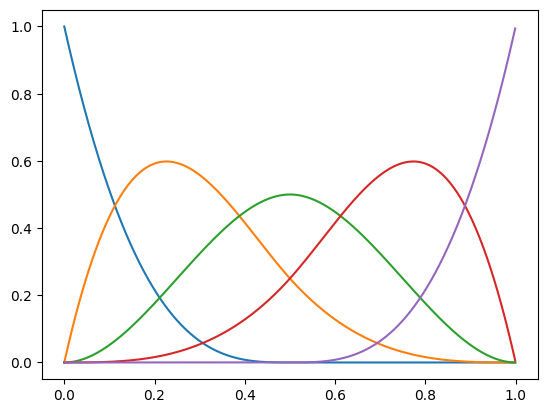

In [7]:
print(out.shape)
for i in range(out.shape[1]):
    plt.plot(input, out[:, i:i+1])

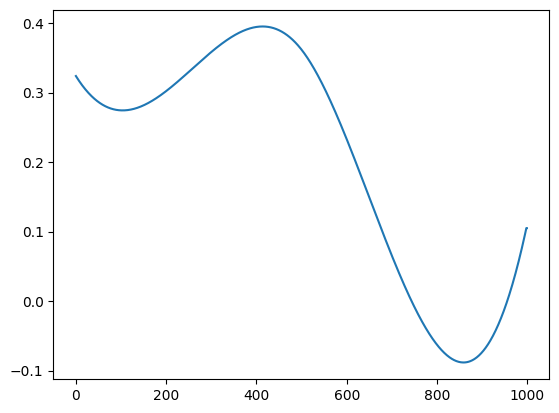

In [8]:
alpha = np.random.normal(size=out.shape[1])
plt.plot((alpha.reshape(1, -1) * out).sum(axis=1))